In [1]:
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

ModuleNotFoundError: No module named 'keras'

In [2]:
model = Sequential([Dense(16, input_shape= (1,), activation='relu'),
                   Dense(32,activation = 'relu'),
                   Dense(2, activation = 'softmax')])

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(Adam(lr = 0.0001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
from preprocessinf_1 import get_data
X,y = get_data()

C:\Users\vbabu\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
model.fit(X,y,batch_size=10, epochs=20,shuffle=True, verbose=2)

Epoch 1/20
 - 1s - loss: 0.6962 - acc: 0.5814
Epoch 2/20
 - 0s - loss: 0.6535 - acc: 0.7367
Epoch 3/20
 - 0s - loss: 0.6067 - acc: 0.8081
Epoch 4/20
 - 0s - loss: 0.5647 - acc: 0.8300
Epoch 5/20
 - 0s - loss: 0.5249 - acc: 0.8605
Epoch 6/20
 - 0s - loss: 0.4873 - acc: 0.8748
Epoch 7/20
 - 0s - loss: 0.4525 - acc: 0.8857
Epoch 8/20
 - 0s - loss: 0.4209 - acc: 0.8957
Epoch 9/20
 - 0s - loss: 0.3937 - acc: 0.9029
Epoch 10/20
 - 0s - loss: 0.3704 - acc: 0.9110
Epoch 11/20
 - 0s - loss: 0.3511 - acc: 0.9129
Epoch 12/20
 - 0s - loss: 0.3350 - acc: 0.9224
Epoch 13/20
 - 0s - loss: 0.3217 - acc: 0.9152
Epoch 14/20
 - 0s - loss: 0.3111 - acc: 0.9248
Epoch 15/20
 - 0s - loss: 0.3021 - acc: 0.9243
Epoch 16/20
 - 0s - loss: 0.2950 - acc: 0.9310
Epoch 17/20
 - 0s - loss: 0.2892 - acc: 0.9305
Epoch 18/20
 - 0s - loss: 0.2842 - acc: 0.9295
Epoch 19/20
 - 0s - loss: 0.2801 - acc: 0.9290
Epoch 20/20
 - 0s - loss: 0.2768 - acc: 0.9286


In [7]:
# make validation set

model.fit(X,y, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 0s - loss: 0.1686 - acc: 0.9783 - val_loss: 1.2429 - val_acc: 0.5381
Epoch 2/20
 - 0s - loss: 0.1578 - acc: 0.9746 - val_loss: 1.3009 - val_acc: 0.5381
Epoch 3/20
 - 0s - loss: 0.1487 - acc: 0.9794 - val_loss: 1.3596 - val_acc: 0.5381
Epoch 4/20
 - 0s - loss: 0.1401 - acc: 0.9778 - val_loss: 1.4150 - val_acc: 0.5333
Epoch 5/20
 - 0s - loss: 0.1328 - acc: 0.9810 - val_loss: 1.4715 - val_acc: 0.5333
Epoch 6/20
 - 0s - loss: 0.1261 - acc: 0.9788 - val_loss: 1.5278 - val_acc: 0.5333
Epoch 7/20
 - 0s - loss: 0.1202 - acc: 0.9804 - val_loss: 1.5828 - val_acc: 0.5333
Epoch 8/20
 - 0s - loss: 0.1147 - acc: 0.9815 - val_loss: 1.6368 - val_acc: 0.5333
Epoch 9/20
 - 0s - loss: 0.1098 - acc: 0.9841 - val_loss: 1.6914 - val_acc: 0.5333
Epoch 10/20
 - 0s - loss: 0.1052 - acc: 0.9799 - val_loss: 1.7416 - val_acc: 0.5333
Epoch 11/20
 - 0s - loss: 0.1014 - acc: 0.9841 - val_loss: 1.7940 - val_acc: 0.5333
Epoch 12/20
 - 0s - loss: 0.0977 - acc

In [8]:
# get new Data
X_test, y_test = get_data()

In [9]:
# Predict 
predictiction = model.predict(X_test, batch_size=10, verbose=0)

In [11]:
for i in range(10):
    print(predictiction[i])

[0.99866426 0.00133575]
[0.00329394 0.99670607]
[0.998635   0.00136494]
[0.00197191 0.9980281 ]
[0.9789437  0.02105624]
[0.00608948 0.99391055]
[0.76655287 0.23344716]
[0.00329394 0.99670607]
[0.9986413  0.00135863]
[0.15416235 0.8458376 ]


In [12]:
rounded_prediction = model.predict_classes(X_test, batch_size=10, verbose=0)

In [14]:
for i in range(10):
    print(rounded_prediction[i])

0
1
0
1
0
1
0
1
0
1


In [20]:
# Confusion matrics

%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

In [21]:
cm = confusion_matrix(y_test, rounded_prediction)

[[ 970   80]
 [  48 1002]]


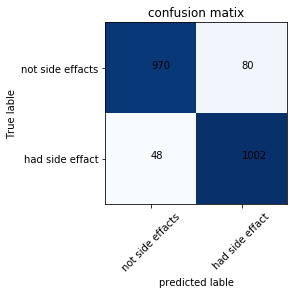

In [29]:
def plot_confution_matix(cm, classes, normalize = False, title= 'confusion matix', cmap  = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_mark = np.arange(len(classes))
    plt.xticks(tick_mark, classes, rotation= 45)
    plt.yticks(tick_mark, classes)
    
    print(cm)
    
    thresh = cm.max()/2
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j])
    plt.tight_layout()
    plt.ylabel('True lable')
    plt.xlabel('predicted lable')

cm_lables = ['not side effacts', 'had side effact']
plot_confution_matix(cm,cm_lables)

In [30]:
# save and load model

model.save('model_trail_model.h5')

In [31]:
from keras.models import load_model
new_model = load_model('model_trail_model.h5')

In [32]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.get_weights()

[array([[-0.10814759, -0.33922702, -0.45168167, -0.4004028 ,  0.52249813,
         -0.22935495, -0.0819062 , -0.19811091,  0.508178  ,  0.47278705,
         -0.43849128,  0.00850191,  0.5147902 ,  0.6327061 ,  0.67958754,
          0.3809406 ]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.10321436,
         0.        ,  0.        ,  0.24389194, -0.02378847, -0.14694396,
         0.        , -0.00855978, -0.15459906, -0.16084178, -0.15048987,
         0.29925552], dtype=float32),
 array([[ 0.2657455 ,  0.10672331,  0.04179898,  0.21495101,  0.1442174 ,
         -0.04840025,  0.06952351,  0.00508991,  0.16137853,  0.31177416,
         -0.08926526,  0.28605798, -0.27132994,  0.01213956, -0.01745933,
          0.08317485,  0.06955308,  0.1012502 ,  0.28279522,  0.07604909,
          0.27671906, -0.0896042 ,  0.30618134,  0.33895776, -0.19226153,
          0.02664667, -0.3535501 , -0.17390455, -0.14054339, -0.33861268,
         -0.0804531 , -0.09286383],
 

In [35]:
new_model.optimizer

In [40]:
# model to_json
# save only the architecture

json_string = model.to_json() 

In [41]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": 

In [42]:
# model reconstruction from json
from keras.models import model_from_json

model_architechture = model_from_json(json_string)


In [43]:
model_architechture.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [48]:
# save only weight 
model.save_weights('model_weight.h5')

In [49]:
model2 = Sequential([Dense(16, input_shape= (1,), activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(2, activation='softmax')])

In [51]:
model2.load_weights('model_weight.h5')

In [53]:
model2.weights

[<tf.Variable 'dense_7/kernel:0' shape=(1, 16) dtype=float32_ref>,
 <tf.Variable 'dense_7/bias:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'dense_8/kernel:0' shape=(16, 32) dtype=float32_ref>,
 <tf.Variable 'dense_8/bias:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'dense_9/kernel:0' shape=(32, 2) dtype=float32_ref>,
 <tf.Variable 'dense_9/bias:0' shape=(2,) dtype=float32_ref>]